# Analisis de datos sobre twitter

La actividades descritas en este cuaderno contemplan lo siguiente: 

#### 1.- Cargaremos del archivo "farmers-protest-tweets-2021-2-4.json (398MBs)" sólo **100 MBs**
#### 2.- Calcular los TOP 10 tweets más retweeted
#### 3.- Los Top users en función a la cantidad de tweets que emitieron
#### 4.- Los top 10 días donde hay más tweets
#### 5.- Los top 10 hashtags más usados
#### 6.- Los top 10 emojis más usados 
#### 7.- Los top 10 users más influyentes en función de lo retweeted de sus tweets.
#### 8.- Clusterización de los tweets

#### Antes de comenzar, cargamos las librerías a utilizar

In [1]:
import pandas as pd #librería de Python especializada en el manejo y análisis de estructuras de datos
from pandas.io.json import json_normalize #Función de pandas utilizada para la normalización de datos 
import warnings #suprime los mensajes repetidos de la misma fuente para reducir la molestia de ver la misma advertencia una y otra vez
warnings.filterwarnings("ignore")
from pathlib import Path #Nos permite manipular rutas de sistemas de archivos de forma rápida en cualquier sistema operativo.
import os # Permite a usted realizar operaciones dependiente del Sistema Operativo
import shutil #Ofrece varias operaciones de alto nivel en archivos y colecciones de archivos.
import datetime #proporciona clases para manipular fechas y hora
import re #Identificar funciones regex
import nltk #Sirve para procesar lenguaje natural
import matplotlib.pyplot as plt #Libreria especializada en la creación de gráficos en dos dimensiones.
from sklearn.cluster import KMeans #Libreria aprendizaje automático
import numpy as np #Libreria para el cálculo numérico y el análisis de datos
from nltk.tokenize import word_tokenize
import time #proporciona clases para manipular fechas y hora

## 1.- Cargar del archivo *'farmers-protest-tweets-2021-2-4.json'* (398MBs) sólo **100 MBs**

#### En primer lugar validaremos el tamaño del archivo JSON. Para esto, crearemos la clase 'comparacion' que nos indica si el tamaño del archivo supera los 100MB

In [2]:
def comparacion(file_size):
    size_limit = 100000000
    if file_size > size_limit:
         return print("El tamaño del archivo es mayor a 100MB. Contiene:", file_size,"bytes")
    else:
        if file_size == size_limit:
             return print("El tamaño del archivo es igual a 100MB")
        else :
             return print("El tamaño del archivo es menor a 100MB. Contiene:", file_size,"bytes")

In [3]:
original_size = os.path.getsize('farmers-protest-tweets-2021-2-4.json') 
comparacion(original_size)

El tamaño del archivo es mayor a 100MB. Contiene: 407720271 bytes


#### Realizamos una copia del archivo, que posteriormente acortaremos a 100 MB

In [4]:
original = r'farmers-protest-tweets-2021-2-4.json'
target = r'farmers-protest-tweets-2021-2-4_copy.json'
#copyfile() metodo que nos permite copiar un archivo
shutil.copyfile(original, target)
print ("Se creó una copia con nombre :", target )

Se creó una copia con nombre : farmers-protest-tweets-2021-2-4_copy.json


#### Y usamos una función para acortar la copia del archivo a 100 MB

In [5]:
file_copy = open(target, "a")

size_limit = 100000000

#truncate() metodo para truncar el tamaño del  archivo
file_copy.truncate(size_limit)

#getsize() metodo para conocer el tamaño del  archivo
size1 = os.path.getsize(target)

#Se muestra el tamaño de la nueva copia
print (f"El nuevo tamaño del archivo es {size1} bytes")

file_copy.close()

El nuevo tamaño del archivo es 100000000 bytes


In [6]:
comparacion(size1)

El tamaño del archivo es igual a 100MB


#### Cortamos la última línea de la copia para asegurarnos que sea un archivo legible

In [7]:
file = open(target, "rb")
pos = next = 0
for line in file:
  pos = next # posición de comienzo de linea
  next += len(line) # Avanza recorriendo linea a linea
file = open(target, 'ab')
# Elimina la última posición
file.truncate(pos)

99997270

## 2.- Calcular los TOP 10 tweets más retweeted

#### Utilizamos la librería pandas para importar el archivo JSON, le damos formato de idioma

In [8]:
raw_tweets = pd.read_json(r'farmers-protest-tweets-2021-2-4_copy.json', lines=True)#read_json() lee el archivo jSON
raw_tweets = raw_tweets[raw_tweets['lang']=='en']#Establecemos el idioma
print("Shape: ", raw_tweets.shape)#Cantidad de folas x columnas
raw_tweets.head()

Shape:  (12175, 21)


,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,The world progresses while the Indian police a...,1364506249291784198,"{'username': 'ArjunSinghPanam', 'displayname':...",[https://twitter.com/ravisinghka/status/136415...,[https://t.co/es3kn0IQAF],0,0,...,0,1364506249291784198,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,"{'username': 'PrdeepNain', 'displayname': 'Pra...",[],[],0,0,...,0,1364506237451313155,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'..."
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,0,1364350947099484160,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S..."
8,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:22:34+00:00,@mandeeppunia1 watch full video here https://t...,@mandeeppunia1 watch full video here youtu.be/...,1364505991887347714,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,0,1364428985074032646,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ..."
11,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:21:51+00:00,@mandeeppunia1 watch full video here https://t...,@mandeeppunia1 watch full video here youtu.be/...,1364505813834989568,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,0,1364480983995584515,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ..."


#### Extraemos la columna usuario, que es un subconjunto del archivo

In [9]:
users = json_normalize(raw_tweets['user'])#json_normalize() utilizada para normalizar un sub array
users.drop(['description', 'linkTcourl'], axis=1, inplace=True)
users.rename(columns={'id':'userId', 'url':'profileUrl'}, inplace=True)
users.head()

,username,displayname,userId,rawDescription,descriptionUrls,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,linkUrl,profileImageUrl,profileBannerUrl,profileUrl
0,ArjunSinghPanam,Arjun Singh Panam,45091142,"Global Citizen, Actor, Director: Sky is the ro...",[],False,2009-06-06T07:50:57+00:00,603,311,17534,4269,23,1211,,False,https://www.cosmosmovieofficial.com,https://pbs.twimg.com/profile_images/121554174...,https://pbs.twimg.com/profile_banners/45091142...,https://twitter.com/ArjunSinghPanam
1,PrdeepNain,Pradeep Nain,1355092620662329349,Live in the sunshine where you belong,[],False,2021-01-29T09:58:06+00:00,14,134,160,240,0,102,,False,None,https://pbs.twimg.com/profile_images/136417063...,https://pbs.twimg.com/profile_banners/13550926...,https://twitter.com/PrdeepNain
2,anmoldhaliwal,Anmol,137908912,coming soon,[],False,2010-04-28T03:12:18+00:00,51,27,228,77,0,12,"Brampton, On",False,None,https://pbs.twimg.com/profile_images/156497514...,None,https://twitter.com/anmoldhaliwal
3,anmoldhaliwal,Anmol,137908912,coming soon,[],False,2010-04-28T03:12:18+00:00,51,27,228,77,0,12,"Brampton, On",False,None,https://pbs.twimg.com/profile_images/156497514...,None,https://twitter.com/anmoldhaliwal
4,anmoldhaliwal,Anmol,137908912,coming soon,[],False,2010-04-28T03:12:18+00:00,51,27,228,77,0,12,"Brampton, On",False,None,https://pbs.twimg.com/profile_images/156497514...,None,https://twitter.com/anmoldhaliwal


#### Generamos el data frame 'users'

In [10]:
users = pd.DataFrame(users)
users.drop_duplicates(subset=['userId'], inplace=True)
print("Shape: ", users.shape)#Cantidad de folas x columnas

Shape:  (3475, 19)


In [11]:
users.head()

,username,displayname,userId,rawDescription,descriptionUrls,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,linkUrl,profileImageUrl,profileBannerUrl,profileUrl
0,ArjunSinghPanam,Arjun Singh Panam,45091142,"Global Citizen, Actor, Director: Sky is the ro...",[],False,2009-06-06T07:50:57+00:00,603,311,17534,4269,23,1211,,False,https://www.cosmosmovieofficial.com,https://pbs.twimg.com/profile_images/121554174...,https://pbs.twimg.com/profile_banners/45091142...,https://twitter.com/ArjunSinghPanam
1,PrdeepNain,Pradeep Nain,1355092620662329349,Live in the sunshine where you belong,[],False,2021-01-29T09:58:06+00:00,14,134,160,240,0,102,,False,None,https://pbs.twimg.com/profile_images/136417063...,https://pbs.twimg.com/profile_banners/13550926...,https://twitter.com/PrdeepNain
2,anmoldhaliwal,Anmol,137908912,coming soon,[],False,2010-04-28T03:12:18+00:00,51,27,228,77,0,12,"Brampton, On",False,None,https://pbs.twimg.com/profile_images/156497514...,None,https://twitter.com/anmoldhaliwal
5,ShariaActivist,Sharia Ali Siddique,1362487487747121152,Little Climate & Environmental Activist | Foun...,[],False,2021-02-18T19:41:57+00:00,46,106,112,60,0,53,she/they,False,None,https://pbs.twimg.com/profile_images/136428288...,https://pbs.twimg.com/profile_banners/13624874...,https://twitter.com/ShariaActivist
6,KaurDosanjh1979,Red 💚,538638801,,[],False,2012-03-27T23:14:32+00:00,427,1005,29803,18962,0,30,,False,None,https://pbs.twimg.com/profile_images/135582023...,https://pbs.twimg.com/profile_banners/53863880...,https://twitter.com/KaurDosanjh1979


#### Limpiamos la primera tabla cargada y generamos el dataframe 'tweets' dejando solamente las columnas que me sirven

In [12]:
# Añadimos la columna 'userId'
user_id = []
for user in raw_tweets['user']:
    uid = user['id']
    user_id.append(uid)
raw_tweets['userId'] = user_id

# Extraémos columnas que no utilizaremos
cols = ['url', 'date', 'renderedContent', 'id', 'userId', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'source', 'media', 'retweetedTweet', 'quotedTweet', 'mentionedUsers']
tweets = raw_tweets[cols]
tweets.rename(columns={'id':'tweetId', 'url':'tweetUrl'}, inplace=True)
print("Shape: ", tweets.shape)

Shape:  (12175, 14)


In [13]:
tweets.head(5)

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,1364506249291784198,45091142,0,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,1355092620662329349,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'..."
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S..."
8,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:22:34+00:00,@mandeeppunia1 watch full video here youtu.be/...,1364505991887347714,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ..."
11,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:21:51+00:00,@mandeeppunia1 watch full video here youtu.be/...,1364505813834989568,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ..."


#### Finalmente hacemos un TOP 10 de la columna 'retweetCount' 

In [14]:
tweets.nlargest(10, 'retweetCount') #Con la función nlargest() Obtenemos el top de los 10 tweet más retweeted

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers
7645,https://twitter.com/dhruv_rathee/status/136414...,2021-02-23 09:40:21+00:00,There's a #FarmersProtest happening in Germany...,1364148079117615105,730520573701443584,666,6164,27888,221,"<a href=""http://twitter.com/download/iphone"" r...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
23348,https://twitter.com/amaanbali/status/136342152...,2021-02-21 09:33:17+00:00,This is Revolution. More than 2.25lac people a...,1363421524879843336,70364936,112,2258,7574,171,"<a href=""http://twitter.com/download/iphone"" r...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
27942,https://twitter.com/saahilmenghani/status/1363...,2021-02-20 16:01:17+00:00,#Verified\n\n👉Gazipur Border ready for summers...,1363156780331593729,79178279,97,1122,2898,76,"<a href=""https://studio.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/media...,NaN,None,None
19099,https://twitter.com/sukhvirington/status/13636...,2021-02-21 22:53:01+00:00,The #FarmersProtest is not a trend that you ca...,1363622786384683013,925165042890309632,22,1038,1614,37,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,None,None
23727,https://twitter.com/saahilmenghani/status/1363...,2021-02-21 08:18:23+00:00,#FarmersProtest\n\n👉Despite attempts to spread...,1363402674633236483,79178279,38,974,2315,48,"<a href=""http://twitter.com/download/android"" ...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,None
2227,https://twitter.com/AkshayBanga1/status/136441...,2021-02-24 03:31:12+00:00,#मोदी_मतलब_देश_चौपट To bring a change for the ...,1364417569218695181,1142336926424240128,9,914,432,22,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
21916,https://twitter.com/Dungarjakhar9/status/13634...,2021-02-21 14:21:11+00:00,Large crowd started to flow into Anaaj Mandi B...,1363493979984072709,1051536481389436928,37,852,616,8,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
20667,https://twitter.com/amarpreet_ka/status/136352...,2021-02-21 16:42:06+00:00,"A sea of supporters, including tens of thousan...",1363529440249016321,2193764668,38,847,2930,60,"<a href=""http://twitter.com/download/iphone"" r...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
22218,https://twitter.com/dansiddiqui/status/1363481...,2021-02-21 13:31:46+00:00,Farmers and agricultural workers attend a rall...,1363481540143902720,28315501,37,846,3690,38,"<a href=""http://twitter.com/download/iphone"" r...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,"[{'username': 'Reuters', 'displayname': 'Reute..."
7149,https://twitter.com/RaviSinghKA/status/1364167...,2021-02-23 10:58:18+00:00,It’s still not too late for the farmers union ...,1364167695592226816,2347762888,86,785,3525,54,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,None,None


## 3.- Los Top users en función a la cantidad de tweets que emitieron

#### Para conocer usuarios en función de tweets, debemos realizar un LFT JOIN entre 'tweets' y 'users'. Para esto, lo primero que hacemos es transformar a en formato '**object**' la columna '*userId*' de cada data frame

In [15]:
tweets['userId'] = tweets['userId'].astype(str)
tweets['userId'] = tweets['userId'].str.strip()
tweets.dtypes

tweetUrl                        object
date               datetime64[ns, UTC]
renderedContent                 object
tweetId                          int64
userId                          object
replyCount                       int64
retweetCount                     int64
likeCount                        int64
quoteCount                       int64
source                          object
media                           object
retweetedTweet                 float64
quotedTweet                     object
mentionedUsers                  object
dtype: object

In [16]:
users['userId'] = users['userId'].astype(str)
users['userId'] = users['userId'].str.strip()
users.dtypes

username            object
displayname         object
userId              object
rawDescription      object
descriptionUrls     object
verified              bool
created             object
followersCount       int64
friendsCount         int64
statusesCount        int64
favouritesCount      int64
listedCount          int64
mediaCount           int64
location            object
protected             bool
linkUrl             object
profileImageUrl     object
profileBannerUrl    object
profileUrl          object
dtype: object

#### Posterior a esto, realizamos el LEFT JOIN extrayendo solo las columnas '*userID*','*username*','*displayname*'

In [17]:
result = pd.merge(tweets[{'userId'}],users[{'userId','username','displayname'}],how="left") #on='userId'
print("Shape: ", result.shape)

Shape:  (12175, 3)


In [18]:
result.head()

,userId,displayname,username
0,45091142,Arjun Singh Panam,ArjunSinghPanam
1,1355092620662329349,Pradeep Nain,PrdeepNain
2,137908912,Anmol,anmoldhaliwal
3,137908912,Anmol,anmoldhaliwal
4,137908912,Anmol,anmoldhaliwal


#### Luego, agrupamos los datos en las columnas *'username', 'userId'*. Para finalmente obtener el TOP 10 de la cantidad mas alta de repeticiones

In [19]:
#groupby().agg agrupa por la columna y se añade el tipo de agregacion
grouped = result.groupby(by = ['username','userId'])['username'].count()
grouped.nlargest(10)

username         userId             
Surrypuria       217105273              297
shells_n_petals  2930682630             296
AhluwaliaA2      1337221335282434049    199
rumsomal         48085084               179
with_kaur        1357327949066870790    145
ajityadavdu      781038774147018753     140
KaurDosanjh1979  538638801              126
ik_stip_boeren   1340734924278685702    115
jot__b           452391771              108
ish_kayy         622149895              107
Name: username, dtype: int64

## 4.- Los top 10 días donde hay más tweets

#### Primero hay que saber en que formato está la columna '*date*' del dataframe 'tweets'

In [20]:
tweets.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,1364506249291784198,45091142,0,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,1355092620662329349,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'..."
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S..."
8,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:22:34+00:00,@mandeeppunia1 watch full video here youtu.be/...,1364505991887347714,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ..."
11,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:21:51+00:00,@mandeeppunia1 watch full video here youtu.be/...,1364505813834989568,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ..."


In [21]:
tweets['date'].dtypes

datetime64[ns, UTC]

#### Transformamos la columna *'date'* a tipo date, para quitar la información de hora y minutos del data frame 'tweets'

In [22]:
tweets['date'] = pd.to_datetime(tweets.date)
tweets['date'] = tweets['date'].dt.date
tweets.head(5)

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24,The world progresses while the Indian police a...,1364506249291784198,45091142,0,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,1355092620662329349,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'..."
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S..."
8,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@mandeeppunia1 watch full video here youtu.be/...,1364505991887347714,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ..."
11,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@mandeeppunia1 watch full video here youtu.be/...,1364505813834989568,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ..."


#### Finalmente agrupamos la columna *'date'* en la cantidad de repeticiones y realizamos un TOP 10 de la mayor cantidad

In [23]:
grouped = tweets.groupby(['date'])['date'].count()
grouped.nlargest(10)

date
2021-02-23    3566
2021-02-22    3133
2021-02-21    3120
2021-02-24    1476
2021-02-20     880
Name: date, dtype: int64

## 5.- Los top 10 hashtags más usados

#### En primer lugar generaremos una columna llamada *'hashtags_in_tweets'* donde obtendremos los hashtag utilizados en cada tweet. Para esto crearemos una función con el nombre *hashtag_collector()* que identificará los hastags

In [24]:
def hashtag_collector(text) :# hashtag collector
    list_of_hashtags = re.findall(r"#[A-Za-z0-9\-\.\_]+",text,re.DOTALL)# Buscamos las palabras que empiezan con '#'
    if(list_of_hashtags != None) :
        list_of_hashtags = [word.replace('#', '') for word in list_of_hashtags]# Encuentra los hashtag y los guarda en un arreglo 
        list_of_hashtags = [word.replace('.', '') for word in list_of_hashtags]# extrae los '#'' y '.' de la lista
        list_of_hashtags = [word.upper() for word in list_of_hashtags]# Cambia el contenido a mayusculas
    return list_of_hashtags

#### Creamos una columna nueva llamada *'hashtags_in_tweets'* donde almacenaremos como array, todos los hashtags obtenidos desde la columna *'renderedContent'* 

In [25]:
tweets["hashtags_in_tweets"] = tweets["renderedContent"].apply(hashtag_collector)
tweets.head(5)

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers,hashtags_in_tweets
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24,The world progresses while the Indian police a...,1364506249291784198,45091142,0,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '...","[MODIDONTSELLFARMERS, FARMERSPROTEST, FREENODE..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,1355092620662329349,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'...","[FARMERSPROTEST, MODIIGNORINGFARMERSDEATHS, MO..."
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S...","[FARMERSPROTEST, NOFARMERSNOFOOD]"
8,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@mandeeppunia1 watch full video here youtu.be/...,1364505991887347714,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ...","[FARMERSPROTEST, NOFARMERSNOFOOD]"
11,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@mandeeppunia1 watch full video here youtu.be/...,1364505813834989568,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ...","[FARMERSPROTEST, NOFARMERSNOFOOD]"


#### Agregamos a la lista *'our_hashtags_in_tweets'* todos los hashtags encontrados en la columna *'hashtags_in_tweets'*

In [26]:
our_hashtags_in_tweets = tweets["hashtags_in_tweets"]
our_hashtags_in_tweets = sum(our_hashtags_in_tweets, [])

In [27]:
our_freq = nltk.FreqDist(our_hashtags_in_tweets)#FreqDist() función que obtiene los resultados frecuentes

In [28]:
dictionary_hashtags = pd.DataFrame({"Hashtag" : list(our_freq.keys()),"Count" : list(our_freq.values())})  #Se genera un DataFrame llamado dictionary_hashtags
dictionary_hashtags

,Hashtag,Count
0,MODIDONTSELLFARMERS,776
1,FARMERSPROTEST,12237
2,FREENODEEPKAUR,173
3,MODIIGNORINGFARMERSDEATHS,1316
4,NOFARMERSNOFOOD,91
...,...,...
2482,HIMANSHIKHURANA,1
2483,WORLDSOCIALJUSTICEDAY,1
2484,SIDHUMOOSEWALA,1
2485,RAKESHTIKET,1


In [29]:
most_hashtags = dictionary_hashtags.nlargest(columns='Count', n = 10)
most_hashtags

,Hashtag,Count
1,FARMERSPROTEST,12237
134,PAGDI_SAMBHAL_JATTA,1584
3,MODIIGNORINGFARMERSDEATHS,1316
30,MSPLAWFORALLCROPS,1303
0,MODIDONTSELLFARMERS,776
29,FARMERSPROTESTS,494
47,DISHARAVI,364
45,INDIA,347
24,MODI_ROJGAR_DO,342
34,FARMERS,340


## 6.- Los top 10 emojis más usados

In [30]:
def emoji_collector(text) :# hashtag collector
    list_of_emojis = re.findall( #Buscamos las palabras que empiezan con
     "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",text,re.DOTALL)
    return list_of_emojis

In [31]:
tweets["emojis_in_tweets"] = tweets["renderedContent"].apply(emoji_collector)
tweets.tail()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers,hashtags_in_tweets,emojis_in_tweets
28349,https://twitter.com/_therealvaibhav/status/136...,2021-02-20,#FarmersProtest \n\nJharkhand :\n\nMassive dan...,1363137015005536256,750573442722852868,1,1,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Alamgircongress', 'displayname'...","[FARMERSPROTEST, FARMERSBILL]",[]
28350,https://twitter.com/Savekisaan/status/13631370...,2021-02-20,Good news 👍\nMore bails in useless cases filed...,1363137003445837830,337710315,0,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,{'url': 'https://twitter.com/Kisanektamorcha/s...,None,[FARMERSPROTEST],[👍]
28353,https://twitter.com/_gurviir/status/1363136822...,2021-02-20,Govt is operating under influence of neo-imper...,1363136822281269252,1245027801146613761,0,1,1,0,"<a href=""http://twitter.com/download/android"" ...",None,NaN,{'url': 'https://twitter.com/Bkuektaugrahan/st...,"[{'username': 'hrw', 'displayname': 'Human Rig...","[FARMERSMAHARALLYBARNALA, DPSTOPINTIMIDATINGFA...",[]
28357,https://twitter.com/amandeepskoutl1/status/136...,2021-02-20,Got bailed today!! Thanks to all.\n#FarmersPro...,1363136771786108931,1216019384323342336,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",None,NaN,{'url': 'https://twitter.com/Kisanektamorcha/s...,None,[FARMERSPROTEST],[]
28358,https://twitter.com/Jkaur70157728/status/13631...,2021-02-20,#FarmersProtest \n\nSo sad 😞 twitter.com/amaan...,1363136590596423684,1332742526072205313,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,NaN,{'url': 'https://twitter.com/amaanbali/status/...,None,[FARMERSPROTEST],[😞]


In [32]:
our_emojis_in_tweets = tweets["emojis_in_tweets"]
our_emojis_in_tweets = sum(our_emojis_in_tweets,[''])

In [33]:
our_freq_emoj = nltk.FreqDist(our_emojis_in_tweets)#FreqDist() función que obtiene los resultados frecuentes
dictionary_emoji = pd.DataFrame({"Emoji" : list(our_freq_emoj.keys()),"Count" : list(our_freq_emoj.values())})  #Se genera un DataFrame llamado dictionary_hashtags
most_emoji = dictionary_emoji.nlargest(columns='Count', n = 10)
most_emoji

,Emoji,Count
24,🙏,182
47,👍,164
283,🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻,137
180,👉,87
3,🇮🇳,72
109,👇,67
4,🙏🏽,53
27,✊,51
33,😂,44
122,❤️,44


## 7.- Los top 10 users más influyentes en función de lo retweeted de sus tweets

In [34]:
tweets.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers,hashtags_in_tweets,emojis_in_tweets
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24,The world progresses while the Indian police a...,1364506249291784198,45091142,0,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '...","[MODIDONTSELLFARMERS, FARMERSPROTEST, FREENODE...",[]
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,1355092620662329349,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'...","[FARMERSPROTEST, MODIIGNORINGFARMERSDEATHS, MO...","[🚜🌾, 💪]"
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S...","[FARMERSPROTEST, NOFARMERSNOFOOD]",[]
8,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@mandeeppunia1 watch full video here youtu.be/...,1364505991887347714,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ...","[FARMERSPROTEST, NOFARMERSNOFOOD]",[]
11,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@mandeeppunia1 watch full video here youtu.be/...,1364505813834989568,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ...","[FARMERSPROTEST, NOFARMERSNOFOOD]",[]


In [35]:
#Realizamos un left join entre los dataframe tweets y users, respectivamente
result_rt = pd.merge(tweets[{'userId','retweetCount'}],users[{'userId','username','displayname'}],how="left")
result_rt

,retweetCount,userId,displayname,username
0,0,45091142,Arjun Singh Panam,ArjunSinghPanam
1,0,1355092620662329349,Pradeep Nain,PrdeepNain
2,0,137908912,Anmol,anmoldhaliwal
3,0,137908912,Anmol,anmoldhaliwal
4,0,137908912,Anmol,anmoldhaliwal
...,...,...,...,...
12170,1,750573442722852868,S Vaibhav,_therealvaibhav
12171,0,337710315,ਅੰਦੋਲਣਜੀਵੀ-ਕਿਸਾਨ-ਦਿਉਲ 🙏,Savekisaan
12172,1,1245027801146613761,Gurvir,_gurviir
12173,0,1216019384323342336,Amandeep Singh,amandeepskoutl1


In [36]:
#Agrupamos por usuarios y sumamos la columna 'reetweetedCount'
grouped_rt = result_rt.groupby(by = ['username','userId'])['retweetCount'].sum() 
grouped_rt.nlargest(10)

username         userId             
amaanbali        70364936               9341
saahilmenghani   79178279               6381
dhruv_rathee     730520573701443584     6164
NavJammu         546937543              3021
iMani_KaurRai    1059846245471133696    2077
Monica_Gill1     71129057               1751
Bkuektaugrahan   1307229281269903360    1512
Devinder_Sharma  92773212               1326
sukhvirington    925165042890309632     1168
RaviSinghKA      2347762888             1019
Name: retweetCount, dtype: int64

## 8.- Clusterización de los tweets

#### Para hacer un análisis de claustering, utilizaremos el método k-means. Con el cual buscaremos la formación de grupos bien delimitados, que contengan elementos cuya distancia entre ellos sea la menor posible

#### En primer lugar, limpiaremos nuestro data frame *'Tweets'*, identificando las variables y excluyendo columnas que no necesitaremos

In [37]:
tweets['tweetId'] = tweets['tweetId'].astype(str) #Convertimos a string la columna 'tweetId'
tweets['tweetId'] = tweets['tweetId'].str.strip()
tweets.dtypes

tweetUrl               object
date                   object
renderedContent        object
tweetId                object
userId                 object
replyCount              int64
retweetCount            int64
likeCount               int64
quoteCount              int64
source                 object
media                  object
retweetedTweet        float64
quotedTweet            object
mentionedUsers         object
hashtags_in_tweets     object
emojis_in_tweets       object
dtype: object

In [38]:
tweets.drop(['retweetedTweet'], axis=1, inplace=True)

In [39]:
tweets.dtypes

tweetUrl              object
date                  object
renderedContent       object
tweetId               object
userId                object
replyCount             int64
retweetCount           int64
likeCount              int64
quoteCount             int64
source                object
media                 object
quotedTweet           object
mentionedUsers        object
hashtags_in_tweets    object
emojis_in_tweets      object
dtype: object

#### Utilizando la función *'describe()'*, podremos ver los datos estadísticos del objeto. Entre los cuales, podemos observar que su variación es muy alta. Por lo tanto, normalizaremos nuestros datos, para que estén dentro del mismo rango

In [40]:
tweets.describe()

,replyCount,retweetCount,likeCount,quoteCount
count,12175.000000,12175.000000,12175.000000,12175.000000
mean,0.574127,6.684517,15.482136,0.448624
std,6.832616,70.674394,285.149736,3.610737
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000
75%,0.000000,2.000000,3.000000,0.000000
max,666.000000,6164.000000,27888.000000,221.000000


#### Creamos el data frame tweets_norm con las variables normalizadas

In [41]:
columns=['replyCount','retweetCount','likeCount','quoteCount'] #Se obtienen solo las variables del DF 'tweets'
tweets_variable = tweets[columns]
tweets_variable.describe()

,replyCount,retweetCount,likeCount,quoteCount
count,12175.000000,12175.000000,12175.000000,12175.000000
mean,0.574127,6.684517,15.482136,0.448624
std,6.832616,70.674394,285.149736,3.610737
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000
75%,0.000000,2.000000,3.000000,0.000000
max,666.000000,6164.000000,27888.000000,221.000000


#### Normalizamos los datos

In [42]:
#Normalizamos los datos para obtener valor minimo 0 y max 1
tweets_norm = (tweets_variable-tweets_variable.min())/(tweets_variable.max()-tweets_variable.min()) 
tweets_norm.dtypes

replyCount      float64
retweetCount    float64
likeCount       float64
quoteCount      float64
dtype: object

#### El siguiente paso es buscar la cantidad óptima de clusters. Para esto utilizamos el método de Jambú. Cálculamos el indicador de suma de cuadrados de cada grupo WCSS (Whithin-Cluster Sum of Sqares) para 10 clusters

In [43]:
wcss = []
for i in range(1,11):# Npumero de iteraciones 10
    kmeans = KMeans(n_clusters = i, max_iter =300)#Crea un modelo con el método de k-means
    kmeans.fit(tweets_norm)#Aplicamos el k-means
    wcss.append(kmeans.inertia_)#le pasamos el valor a wcss que está en kmeans.inertia_

#### Graficamos los resultados de WCSS para formar un Codo de Jambú

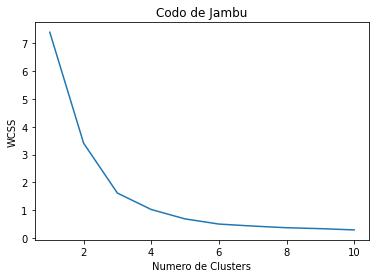

In [44]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambu")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')# WCSS. Es un indicador de qué tan similares son los elementos dentro del cluster
plt.show()

 #### Identificaremos en qué punto el gráfico comienza a disminuir de manera drástica, en este caso **'3'** Por lo tanto crearemos 3 clusters

In [45]:
clustering = KMeans(n_clusters= 3, max_iter =300) #Al objeto Clustering se le asigna el cálculo de la función KMeans
clustering.fit(tweets_norm) #Se genera el cálculo

KMeans(n_clusters=3)

In [46]:
tweets['KMeans_Clusters']=clustering.labels_ #Se crea una columna con el valor calculado
tweets.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,quotedTweet,mentionedUsers,hashtags_in_tweets,emojis_in_tweets,KMeans_Clusters
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24,The world progresses while the Indian police a...,1364506249291784198,45091142,0,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",None,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '...","[MODIDONTSELLFARMERS, FARMERSPROTEST, FREENODE...",[],0
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,1355092620662329349,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,None,"[{'username': 'Kisanektamorcha', 'displayname'...","[FARMERSPROTEST, MODIIGNORINGFARMERSDEATHS, MO...","[🚜🌾, 💪]",0
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,None,"[{'username': 'ReallySwara', 'displayname': 'S...","[FARMERSPROTEST, NOFARMERSNOFOOD]",[],0
8,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@mandeeppunia1 watch full video here youtu.be/...,1364505991887347714,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,None,"[{'username': 'mandeeppunia1', 'displayname': ...","[FARMERSPROTEST, NOFARMERSNOFOOD]",[],0
11,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24,@mandeeppunia1 watch full video here youtu.be/...,1364505813834989568,137908912,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,None,"[{'username': 'mandeeppunia1', 'displayname': ...","[FARMERSPROTEST, NOFARMERSNOFOOD]",[],0


In [47]:
from sklearn.decomposition import PCA #
pca = PCA(n_components=2) #se crea un modelo de PCA con 2 componentes
pca_tweets= pca.fit_transform(tweets_norm) # obtener los 2 componentes principales del objeto 'tweets_norm'
pca_tweets_df = pd.DataFrame(data =pca_tweets, columns = ['Componente_1','Componente_2'])# Creamos DataFrame que obtiene los valores de los dos componentes
pca_nom_tweets = pd.concat([pca_tweets_df, tweets[["KMeans_Clusters"]]],axis=1) #Añadimos la columna de los KMeans calculados 

In [48]:
pca_nom_tweets

,Componente_1,Componente_2,KMeans_Clusters
0,-0.002443,0.000582,0.0
1,-0.002443,0.000582,0.0
2,-0.002443,0.000582,NaN
3,-0.002443,0.000582,0.0
4,-0.002443,0.000582,NaN
...,...,...,...
28349,NaN,NaN,0.0
28350,NaN,NaN,0.0
28353,NaN,NaN,0.0
28357,NaN,NaN,0.0


In [49]:
pca_nom_tweets=pca_nom_tweets.fillna(0) #Quitamos caracteres NaN

In [50]:
pca_nom_tweets['KMeans_Clusters']=(pca_nom_tweets['KMeans_Clusters']).astype('int64') # Transformamos la columna 'KMeans_Clusters' a int
pca_nom_tweets.dtypes

Componente_1       float64
Componente_2       float64
KMeans_Clusters      int64
dtype: object

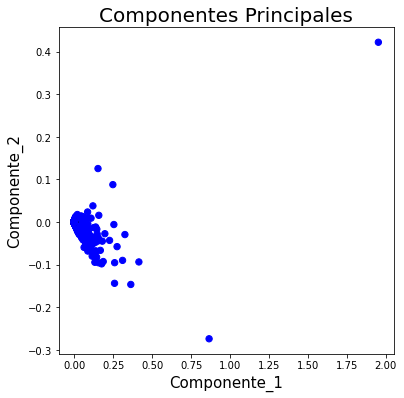

In [51]:
fig = plt.figure(figsize = (6,6))#Creamos la figura para poder incluir el gráfico

ax = fig.add_subplot(1,1,1) #Formato fig
ax.set_xlabel('Componente_1', fontsize=15)
ax.set_ylabel('Componente_2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme = np.array(["blue","yellow","red"]) #Se agrega una variable tema que contiene los colores a gráficar
ax.scatter(x = pca_nom_tweets.Componente_1, y = pca_nom_tweets.Componente_2,  #Valores de la fig.1
           c= color_theme[pca_nom_tweets.KMeans_Clusters], s=40)

plt.show()

#### Luego cruzamos las variables normalizadas

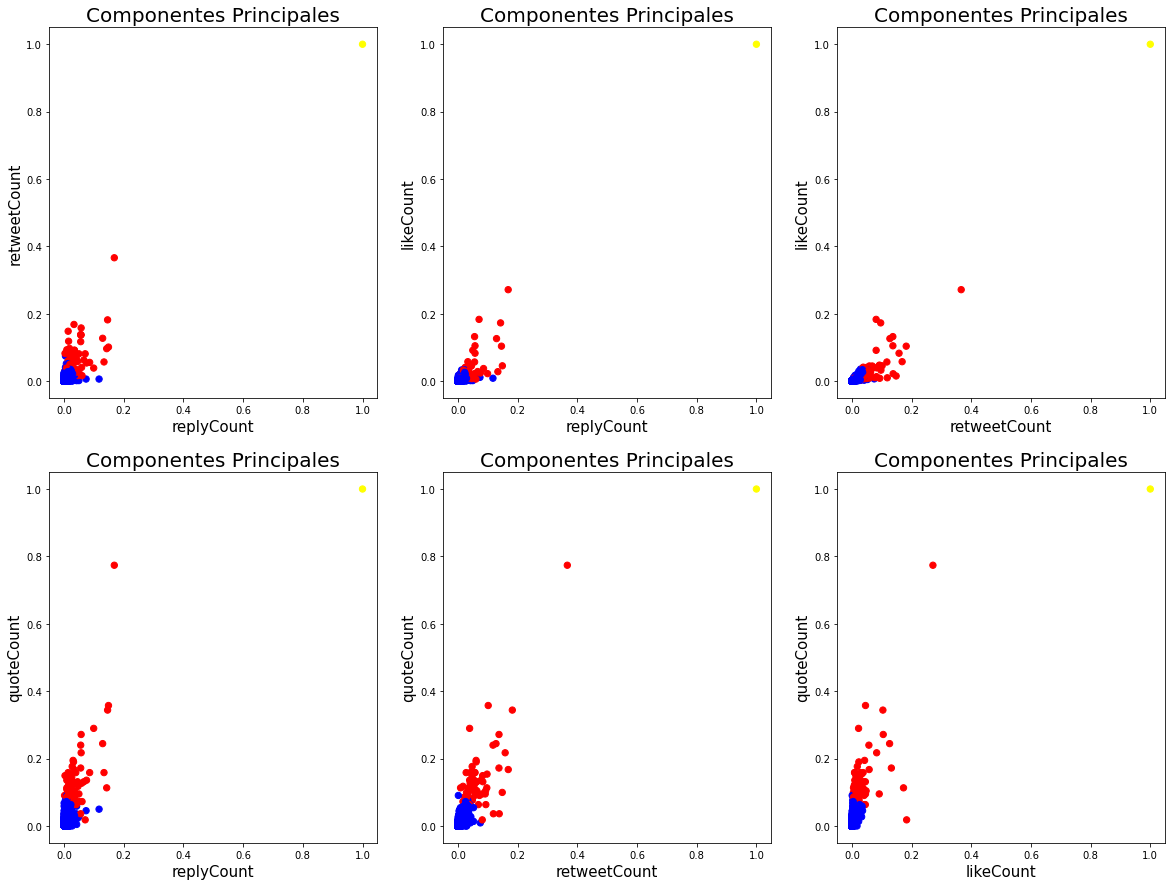

In [124]:
fig = plt.figure(figsize = (20,15)) #Creamos la figura para poder incluir los gráficos

ax = fig.add_subplot(2,3,1)  #Formato fig.1
ax.set_xlabel('replyCount', fontsize=15)
ax.set_ylabel('retweetCount', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)
 
ax1 = fig.add_subplot(2,3,2) #Formato fig.2
ax1.set_xlabel('replyCount', fontsize=15)
ax1.set_ylabel('likeCount', fontsize=15)
ax1.set_title('Componentes Principales', fontsize=20)

ax2 = fig.add_subplot(2,3,3) #Formato fig.3
ax2.set_xlabel('retweetCount', fontsize=15)
ax2.set_ylabel('likeCount', fontsize=15)
ax2.set_title('Componentes Principales', fontsize=20)

ax3 = fig.add_subplot(2,3,4) #Formato fig.4
ax3.set_xlabel('replyCount', fontsize=15)
ax3.set_ylabel('quoteCount', fontsize=15)
ax3.set_title('Componentes Principales', fontsize=20)

ax4 = fig.add_subplot(2,3,5) #Formato fig.5
ax4.set_xlabel('retweetCount', fontsize=15)
ax4.set_ylabel('quoteCount', fontsize=15)
ax4.set_title('Componentes Principales', fontsize=20)

ax5 = fig.add_subplot(2,3,6) #Formato fig.6
ax5.set_xlabel('likeCount', fontsize=15)
ax5.set_ylabel('quoteCount', fontsize=15)
ax5.set_title('Componentes Principales', fontsize=20)


color_theme = np.array(["blue","yellow","red"]) #Se agrega una variable tema que contiene los colores a gráficar

ax.scatter(x = tweets_norm.replyCount, y = tweets_norm.retweetCount, #Valores de la fig.1
           c= color_theme[tweets.KMeans_Clusters], s=40)

ax1.scatter(x = tweets_norm.replyCount, y = tweets_norm.likeCount,  #Valores de la fig.2
           c= color_theme[tweets.KMeans_Clusters], s=40)

ax2.scatter(x = tweets_norm.retweetCount, y = tweets_norm.likeCount,  #Valores de la fig.3
           c= color_theme[tweets.KMeans_Clusters], s=40)

ax3.scatter(x = tweets_norm.replyCount, y = tweets_norm.quoteCount,  #Valores de la fig.4
           c= color_theme[tweets.KMeans_Clusters], s=40)

ax4.scatter(x = tweets_norm.retweetCount, y = tweets_norm.quoteCount,  #Valores de la fig.5
           c= color_theme[tweets.KMeans_Clusters], s=40)

ax5.scatter(x = tweets_norm.likeCount, y = tweets_norm.quoteCount,  #Valores de la fig.6
           c= color_theme[tweets.KMeans_Clusters], s=40)

plt.show()